<a href="https://colab.research.google.com/github/MarcosRMG/Bootecamp-Alura-Data-Science/blob/main/Tratamento%2C_explora%C3%A7%C3%A3o_e_visualiza%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fontes externas, limpeza e manipulacao de dados

##Usando fontes alternativas de dados

####Bibliotecas

In [1]:
import pandas as pd
from io import StringIO
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import matplotlib.ticker as ticker

####Funções

In [2]:
#retira os espaços e o "/n"
def trata_html(html_entrada):
  return ' '.join(html_entrada.split()).replace('> <', '><')

####Dados

In [3]:
fonte_procedimentos_hospitalares = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/A150536189_28_143_208.csv'

procedimentos_hospitalares = pd.read_csv(fonte_procedimentos_hospitalares, 
                                         encoding='ISO-8859-1', skiprows=3,
                                         sep=';', skipfooter=12, thousands='.',
                                         decimal=',')

#configura a visualização do ponto flutuante
pd.options.display.float_format = '{:.2f}'.format

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [4]:
#Texto copiado da página do wikipédia
populacao_estado = '''Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	da Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
'''

In [5]:
'''
StringIO é a biblioteca que irá fazer a leitura do texto copiado do wikipédia
para leitura posterior com o pandas
'''
populacao_estado_io = StringIO(populacao_estado)

In [6]:
#Objeto lido com o StringIO
type(populacao_estado_io)

_io.StringIO

In [7]:
df_populacao_estado = pd.read_csv(populacao_estado_io, sep='\t')

In [8]:
df_populacao_estado

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


####Tratamentos

In [9]:
#Definindo a unidade da federacao como index
procedimentos_hospitalares.set_index('Unidade da Federação', inplace=True)
procedimentos_hospitalares.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23


In [10]:
#Verificação dos tipos de dados presentes no DataFrame
procedimentos_hospitalares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 153 entries, 2008/Jan to Total
dtypes: float64(151), object(2)
memory usage: 32.5+ KB


In [11]:
'''
A funcao to_numeric transforma o "-" em "Nan", possibilitando a visualização gráfica
'''
procedimentos_hospitalares['2020/Ago'] = pd.to_numeric(procedimentos_hospitalares['2020/Ago'], 
                                                       errors='coerce')

In [12]:
gasto_2020_jul = procedimentos_hospitalares['2020/Jul']

In [13]:
gasto_2020_jul

Unidade da Federação
11 Rondônia               11152107.08
12 Acre                    3915193.20
13 Amazonas               19346450.18
14 Roraima                 3015488.30
15 Pará                   38438873.79
16 Amapá                   3249565.87
17 Tocantins               9131707.60
21 Maranhão               32936503.37
22 Piauí                  17871598.61
23 Ceará                  55180751.48
24 Rio Grande do Norte    26302373.94
25 Paraíba                26902438.72
26 Pernambuco             74192800.58
27 Alagoas                18351680.84
28 Sergipe                10313262.56
29 Bahia                  83992134.91
31 Minas Gerais          164891823.64
32 Espírito Santo         33290880.33
33 Rio de Janeiro         98722687.54
35 São Paulo             366721243.71
41 Paraná                109658360.43
42 Santa Catarina         63467828.84
43 Rio Grande do Sul     100531035.83
50 Mato Grosso do Sul     18755557.92
51 Mato Grosso            16371639.49
52 Goiás                  394

In [14]:
#Calculo da proporção de gastos por estado
proporcao_gasto_2020_jul = (gasto_2020_jul / gasto_2020_jul.sum()) * 100

In [15]:
proporcao_gasto_2020_jul

Unidade da Federação
11 Rondônia               0.76
12 Acre                   0.27
13 Amazonas               1.31
14 Roraima                0.20
15 Pará                   2.61
16 Amapá                  0.22
17 Tocantins              0.62
21 Maranhão               2.24
22 Piauí                  1.21
23 Ceará                  3.75
24 Rio Grande do Norte    1.79
25 Paraíba                1.83
26 Pernambuco             5.04
27 Alagoas                1.25
28 Sergipe                0.70
29 Bahia                  5.71
31 Minas Gerais          11.21
32 Espírito Santo         2.26
33 Rio de Janeiro         6.71
35 São Paulo             24.92
41 Paraná                 7.45
42 Santa Catarina         4.31
43 Rio Grande do Sul      6.83
50 Mato Grosso do Sul     1.27
51 Mato Grosso            1.11
52 Goiás                  2.68
53 Distrito Federal       1.72
Name: 2020/Jul, dtype: float64

####Visualização

In [16]:
procedimentos_hospitalares.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2755620.24,2

In [17]:
procedimentos_hospitalares.tail()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,61549863.09,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,102298314.76,100260145.30,95917106.56,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86051002.13,100531035.83,101374341.51,11958647088.33
50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,12737864.70,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,19870933.20,18913862.69,19591383.84,18935437.09,17230688.81,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17331445.92,18755557.92,19241624.02,2172157981.36
51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,12391024.30,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,16314811.22,16763581.32,15608982.84,15855641.23,15811477.04,15029205.51,15249241.20,15046851.63,14886817.29,12546999.04,13604225.34,13151005.63,16371639.49,17790649.87,2036923784.59
52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.6

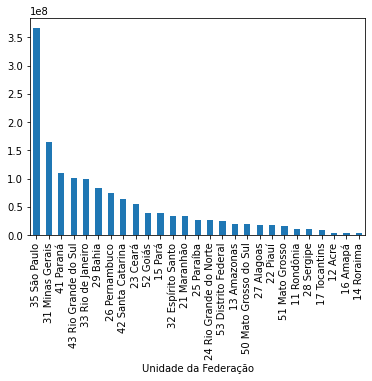

In [18]:
gasto_2020_jul.sort_values(ascending=False).T.plot(kind='bar')

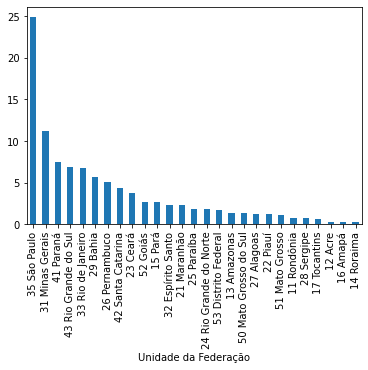

In [19]:
proporcao_gasto_2020_jul.sort_values(ascending=False).plot(kind='bar')

###Desafio 01 - Entre nos dados do Wikipédia e Leia a Base de dados direto do Wikipédia.

#####1.1 Leitura e limpeza do html

In [20]:
#Endereco eletrônico com as informações
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

In [21]:
#obtem o retorno da url
response = urlopen(url)

In [22]:
#Leitura do html e decodificação
html = response.read().decode('UTF-8')

In [23]:
#Tratamento do html
html = trata_html(html)

In [24]:
html

'<!DOCTYPE html><html class="client-nojs" lang="pt" dir="ltr"><head><meta charset="UTF-8"/><title>Lista de unidades federativas do Brasil por população – Wikipédia, a enciclopédia livre</title><script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t."," \\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"6bfbe424-3806-4e43-ab0f-250212ce4296","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Lista_de_unidades_federativas_do_Brasil_por_população","wgTitle":"Lista de unidades federativas do Brasil por população","wgCurRevisionId":59704740,"wgRevisionId":59704740,"wgArticleId":7745,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Listas de geografia do 

In [25]:
#cria objeto soup para utilizar os métodos da biblioteca
soup = BeautifulSoup(html, 'html.parser')

#####1.2 Capturando os títulos

In [26]:
#Capturando os títulos
titulos = soup('th', limit=5) 
titulos

[<th>Posição </th>,
 <th>Unidade federativa </th>,
 <th>População </th>,
 <th>% da pop. total </th>,
 <th>País comparável <p>(habitantes) </p></th>]

In [27]:
#Filtrando os textos
for item in range(5):
  titulos[item] = titulos[item].get_text() 

In [28]:
titulos

['Posição ',
 'Unidade federativa ',
 'População ',
 '% da pop. total ',
 'País comparável (habitantes) ']

#####1.3 Capturando colunas

In [29]:
#dados das linhas da tabela
colunas = soup('td', limit=135)
colunas

[<td>1 </td>,
 <td align="left"><img alt="" class="thumbborder" data-file-height="520" data-file-width="780" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Bandeira_do_estado_de_S%C3%A3o_Paulo.svg/22px-Bandeira_do_estado_de_S%C3%A3o_Paulo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Bandeira_do_estado_de_S%C3%A3o_Paulo.svg/33px-Bandeira_do_estado_de_S%C3%A3o_Paulo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Bandeira_do_estado_de_S%C3%A3o_Paulo.svg/44px-Bandeira_do_estado_de_S%C3%A3o_Paulo.svg.png 2x" width="22"/> <a href="/wiki/S%C3%A3o_Paulo_(estado)" title="São Paulo (estado)">São Paulo</a></td>,
 <td align="right">46 289 333 </td>,
 <td>21,9% </td>,
 <td><img alt="Flag of Spain.svg" class="thumbborder" data-file-height="500" data-file-width="750" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/22px-Flag_of_Spain.svg.png" srcset="//upload.wikime

In [30]:
posicao = []
estados = []
populacao = []
proporcao = []
pais_comparavel = []
item_0 = 0
item_1 = 1
item_2 = 2
item_3 = 3
item_4 = 4


for item in range(len(colunas)):
  colunas[item] = colunas[item].get_text()

for item in range(27):
  posicao.append(colunas[item_0])
  estados.append(colunas[item_1])
  populacao.append(colunas[item_2])
  proporcao.append(colunas[item_3])
  pais_comparavel.append(colunas[item_4])
  item_0 += 5
  item_1 += 5
  item_2 += 5
  item_3 += 5
  item_4 += 5

#####1.4 Criando o DataFrame com os dados

In [31]:
populacao_estado_wiki = pd.DataFrame({
    titulos[0]: posicao,
    titulos[1]: estados,
    titulos[2]: populacao,
    titulos[3]: proporcao,
    titulos[4]: pais_comparavel
})

In [32]:
populacao_estado_wiki

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 279 638,"3,4%",Sérvia (7 114 393)


#####1.5 Outras soluções

###### Obtendo o HTML e selecionando a tabela

Referências: Clarisse Alvarenga e William Cutrim

###### *Solução 1*

In [33]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

In [34]:
r = requests.get(url) #busca do html
r

<Response [200]>

In [35]:
df_lista = pd.read_html(r.text) #obtendo as tabelas da página
df_lista

[    Posição  ...        País comparável (habitantes)
 0         1  ...                Espanha (46 439 864)
 1         2  ...              Sri Lanka (20 675 000)
 2         3  ...          Países Baixos (16 922 900)
 3         4  ...                  Chade (14 037 000)
 4         5  ...                Bolívia (11 410 651)
 5         6  ...                Bélgica (11 250 659)
 6         7  ...            Bielorrússia (9 485 300)
 7         8  ...  Emirados Árabes Unidos (9 157 000)
 8         9  ...                 Áustria (8 602 112)
 9        10  ...                  Sérvia (7 114 393)
 10       12  ...                Paraguai (7 003 406)
 11       11  ...                Paraguai (7 003 406)
 12       13  ...                  Líbano (4 168 000)
 13       14  ...                  Líbano (4 168 000)
 14       15  ...                  Líbano (4 168 000)
 15       16  ...                 Uruguai (3 415 866)
 16       17  ...                 Uruguai (3 415 866)
 17       18  ...           

In [36]:
len(df_lista) #A página retornou cinco tabelas

5

In [37]:
#Seleção da tabela
df_interesse = df_lista[0]
df_interesse.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


######*Solução 2*

In [38]:
#Thousands retira o espaço dos dados da coluna população
pd.read_html(url, thousands=' ')[0]

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46289333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21331292,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17366189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14930634,"7,1%",Chade (14 037 000)
4,5,Paraná,11516840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11422973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9616621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9187103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8690745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7279638,"3,4%",Sérvia (7 114 393)


###Desafio 02 - Neste desafio temos uma série de passos:

Padronizar os nomes das colunas

Transformar os dados nos tipos corretos

Transformar a UF em index

In [39]:
df_populacao_estado.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


####2.1 Padronizar o nome das colunas

In [40]:
df_populacao_estado.columns

Index(['Posição', 'Unidade federativa', 'População', '% da pop. total',
       'País comparável'],
      dtype='object')

In [41]:
colunas = {
    'Posição': 'posicao', 
    'Unidade federativa': 'uf', 
    'População': 'populacao', 
    '% da pop. total': 'proporcao',
    'País comparável': 'pais comparavel'}

In [42]:
df_populacao_estado.rename(columns=colunas, inplace=True)

In [43]:
df_populacao_estado.head()

,posicao,uf,populacao,proporcao,pais comparavel
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


####2.2 Transformar os dados nos tipos corretos

#####2.2.1 Transformando a coluna população no tipo inteiro

In [44]:
df_populacao_estado.dropna(inplace=True)

In [45]:
df_populacao_estado.head()

,posicao,uf,populacao,proporcao,pais comparavel
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [46]:
df_populacao_estado.tail()

,posicao,uf,populacao,proporcao,pais comparavel
23,23,Rondônia,1 796 460,"0,8%",Gabão (1 725 000)
24,24,Tocantins,1 590 248,"0,7%",Bahrein (1 359 800)
25,25,Acre,894 470,"0,4%",Fiji (859 178)
26,26,Amapá,861 773,"0,4%",Fiji (859 178)
27,27,Roraima,631 181,"0,3%",Luxemburgo (562 958)


In [47]:
df_populacao_estado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   posicao          27 non-null     object
 1   uf               27 non-null     object
 2   populacao        27 non-null     object
 3   proporcao        27 non-null     object
 4   pais comparavel  27 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [48]:
#Gerando uma lista com as informações
populacao = df_populacao_estado['populacao'].to_list()
populacao

['46 289 333',
 '21 331 292',
 '17 366 189',
 '14 930 634',
 '11 516 840',
 '11 422 973',
 '9 616 621',
 '9 187 103',
 '8 690 745',
 '7 279 638',
 '7 142 070',
 '7 127 460',
 '4 228 381',
 '4 064 052',
 '4 039 277',
 '3 534 165',
 '3 526 220',
 '3 351 543',
 '3 281 480',
 '3 055 149',
 '2 809 394',
 '2 318 822',
 '1 796 460',
 '1 590 248',
 '894 470',
 '861 773',
 '631 181']

In [49]:
#Convertendo os dados da lista para inteiro
'''
Passos: 
1 - Percorrer todos os elementos da lista, 
2 - Separar a string onde há espaços, eliminando os espaços
3 - Juntar as strings e converter para inteiro
Resultado: Número inteiro sem os espaços
'''
for item in range(len(populacao)):
  populacao[item] = populacao[item].split()
  populacao[item] = int(''.join(populacao[item]))

In [50]:
populacao

[46289333,
 21331292,
 17366189,
 14930634,
 11516840,
 11422973,
 9616621,
 9187103,
 8690745,
 7279638,
 7142070,
 7127460,
 4228381,
 4064052,
 4039277,
 3534165,
 3526220,
 3351543,
 3281480,
 3055149,
 2809394,
 2318822,
 1796460,
 1590248,
 894470,
 861773,
 631181]

In [51]:
#substituição dos dados no dataframe
df_populacao_estado['populacao'] = populacao

In [52]:
df_populacao_estado.head()

,posicao,uf,populacao,proporcao,pais comparavel
1,1,São Paulo,46289333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21331292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17366189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14930634,"7,1%",Chade (14 037 000)
5,5,Paraná,11516840,"5,4%",Bolívia (11 410 651)


In [53]:
df_populacao_estado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   posicao          27 non-null     object
 1   uf               27 non-null     object
 2   populacao        27 non-null     int64 
 3   proporcao        27 non-null     object
 4   pais comparavel  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


######Solução da aula

Tratamentos realizados em aula

######*Dados*

Captura dos dados

In [54]:
populacao_estado_2 = '''Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
'''

In [55]:
populacao_estado_2 = StringIO(populacao_estado_2)

In [56]:
populacao_estado_2_df = pd.read_csv(populacao_estado_2, sep='\t')

In [57]:
populacao_estado_2_df

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


######*Limpeza dos dados*

Conversão dos dados da coluna População

In [58]:
populacao_estado_2_df.dropna(inplace=True)
populacao_estado_2_df.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [59]:
populacao_estado_2_df.rename(columns={'Posição': 'posicao', 'Unidade federativa': 
                                      'uf', 'População': 'populacao', 
                                      '% da pop. total': 'proporcao', 
                                      'País comparável': 'pais comparavel'},
                             inplace=True)

In [60]:
populacao_estado_2_df.head()

,posicao,uf,populacao,proporcao,pais comparavel
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [61]:
'''
str - permite a utilização de métodos de string na series
astype() - converte o tipo de dado
'''
populacao_estado_2_df['populacao'] = populacao_estado_2_df['populacao'].str.replace(' ', '').astype(int)
display(populacao_estado_2_df.head())
populacao_estado_2_df.info()

,posicao,uf,populacao,proporcao,pais comparavel
1,1,São Paulo,46289333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21331292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17366189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14930634,"7,1%",Chade (14 037 000)
5,5,Paraná,11516840,"5,4%",Bolívia (11 410 651)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   posicao          27 non-null     object
 1   uf               27 non-null     object
 2   populacao        27 non-null     int64 
 3   proporcao        27 non-null     object
 4   pais comparavel  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


In [62]:
populacao_estado_2_df = populacao_estado_2_df[['uf', 'populacao']]
populacao_estado_2_df.head()

,uf,populacao
1,São Paulo,46289333
2,Minas Gerais,21331292
3,Rio de Janeiro,17366189
4,Bahia Bahia,14930634
5,Paraná,11516840


In [63]:
populacao_estado_2_df.set_index('uf', inplace=True)
populacao_estado_2_df.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


######*Junção dos dados*

Objetivo: Unir a serie com os dados dos gastos de julho mais a serie com os dados da população

In [64]:
gasto_2020_jul.head()

Unidade da Federação
11 Rondônia   11152107.08
12 Acre        3915193.20
13 Amazonas   19346450.18
14 Roraima     3015488.30
15 Pará       38438873.79
Name: 2020/Jul, dtype: float64

In [65]:
#Retirar a numeração que acompanha o nome do estado
gasto_2020_jul.index = gasto_2020_jul.index.str[3:]
gasto_2020_jul.head()

Unidade da Federação
Rondônia   11152107.08
Acre        3915193.20
Amazonas   19346450.18
Roraima     3015488.30
Pará       38438873.79
Name: 2020/Jul, dtype: float64

In [66]:
populacao_estado_2_df.index[0]

' São Paulo'

In [67]:
#Retirar os espaços no índice com a função de string strip
populacao_estado_2_df.index = populacao_estado_2_df.index.str.strip()
populacao_estado_2_df.index[0]

'São Paulo'

In [68]:
#Retirar a repetição dos estados copiados da página do wikipédia
for estado in gasto_2020_jul.index:
  populacao_estado_2_df.index = populacao_estado_2_df.index.str.replace(f'{estado} {estado}', estado)

In [69]:
populacao_estado_2_df = populacao_estado_2_df.join(gasto_2020_jul)
populacao_estado_2_df.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,366721243.71
Minas Gerais,21331292,164891823.64
Rio de Janeiro,17366189,98722687.54
Bahia,14930634,83992134.91
Paraná,11516840,109658360.43


#####2.2.2 Transformando a coluna proporção no tipo float

In [70]:
populacao_proporcao = df_populacao_estado['proporcao'].to_list()

In [71]:
df_populacao_estado.head()

,posicao,uf,populacao,proporcao,pais comparavel
1,1,São Paulo,46289333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21331292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17366189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14930634,"7,1%",Chade (14 037 000)
5,5,Paraná,11516840,"5,4%",Bolívia (11 410 651)


In [72]:
populacao_proporcao[4]

'5,4%'

In [73]:
'''
Objetivo: Retirar o simbolo % e substituir a vírgula pelo ponto
Passo 1: Se a string tiver 5 caracteres substituir por uma nova string com 4 
caracteres, excluindo o último caractere %;
Passo 2: Ou então substituir por 3 caracteres, excluíndo o último caractere %;
Passo 3: Substituir a vírgula por ponto e converter para float
'''
for item in range(len(populacao_proporcao)):
  if len(populacao_proporcao[item]) == 5:
    populacao_proporcao[item] = populacao_proporcao[item][0:4]
    populacao_proporcao[item] = float(populacao_proporcao[item][0] + populacao_proporcao[item][1] + '.' +  populacao_proporcao[item][3])
  elif len(populacao_proporcao[item]) == 4:
    populacao_proporcao[item] = populacao_proporcao[item][0:3]
    populacao_proporcao[item] = float(populacao_proporcao[item][0] + '.' +  populacao_proporcao[item][2])

In [74]:
populacao_proporcao

[21.9,
 10.1,
 8.2,
 7.1,
 5.4,
 5.4,
 4.5,
 4.3,
 4.1,
 3.4,
 3.4,
 3.4,
 2.0,
 1.9,
 1.9,
 1.7,
 1.7,
 1.6,
 1.6,
 1.4,
 1.3,
 1.1,
 0.8,
 0.7,
 0.4,
 0.4,
 0.3]

In [75]:
df_populacao_estado['proporcao'] = populacao_proporcao

In [76]:
df_populacao_estado.head()

,posicao,uf,populacao,proporcao,pais comparavel
1,1,São Paulo,46289333,21.90,Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21331292,10.10,Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17366189,8.20,Países Baixos (16 922 900)
4,4,Bahia Bahia,14930634,7.10,Chade (14 037 000)
5,5,Paraná,11516840,5.40,Bolívia (11 410 651)


In [77]:
df_populacao_estado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   posicao          27 non-null     object 
 1   uf               27 non-null     object 
 2   populacao        27 non-null     int64  
 3   proporcao        27 non-null     float64
 4   pais comparavel  27 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


####2.3 Transformar a UF em index

In [78]:
df_populacao_estado.set_index('uf', inplace=True)

In [79]:
df_populacao_estado.head()

,posicao,populacao,proporcao,pais comparavel
uf,,,,
São Paulo,1,46289333,21.90,Flag of Spain.svg Espanha (46 439 864)
Minas Gerais,2,21331292,10.10,Sri Lanka (20 675 000)
Rio de Janeiro,3,17366189,8.20,Países Baixos (16 922 900)
Bahia Bahia,4,14930634,7.10,Chade (14 037 000)
Paraná,5,11516840,5.40,Bolívia (11 410 651)


##Manipulação de junção de tabelas

###Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

Links de referencia:

https://www.alura.com.br/artigos/manipulacao-de-strings-no-pandas-lower-replace-startswith-e-contains

https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [80]:
#Métodos de string do Python
dir(str)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

**Metodos de String disponiveis no Pandas**

Method Description

cat() Concatenate strings

split() Split strings on delimiter

rsplit() Split strings on delimiter working from the end of the string

get() Index into each element (retrieve i-th element)

join() Join strings in each element of the Series with passed separator

get_dummies() Split strings on the delimiter returning DataFrame of dummy variables

contains() Return boolean array if each string contains pattern/regex

replace() Replace occurrences of pattern/regex/string with some other string or the return value of a callable given the occurrence

repeat() Duplicate values (s.str.repeat(3) equivalent to x * 3)

pad() Add whitespace to left, right, or both sides of strings

center() Equivalent to str.center

ljust() Equivalent to str.ljust

rjust() Equivalent to str.rjust

zfill() Equivalent to str.zfill

wrap() Split long strings into lines with length less than a given width

slice() Slice each string in the Series

slice_replace() Replace slice in each string with passed value

count() Count occurrences of pattern

startswith() Equivalent to str.startswith(pat) for each element

endswith() Equivalent to str.endswith(pat) for each element

findall() Compute list of all occurrences of pattern/regex for each string

match() Call re.match on each element, returning matched groups as list

extract() Call re.search on each element, returning DataFrame with one row for each element and one column for each regex capture group

extractall() Call re.findall on each element, returning DataFrame with one row for each match and one column for each regex capture group

len() Compute string lengths

strip() Equivalent to str.strip

rstrip() Equivalent to str.rstrip

lstrip() Equivalent to str.lstrip

partition() Equivalent to str.partition

rpartition() Equivalent to str.rpartition

lower() Equivalent to str.lower

casefold() Equivalent to str.casefold

upper() Equivalent to str.upper

find() Equivalent to str.find

rfind() Equivalent to str.rfind

index() Equivalent to str.index

rindex() Equivalent to str.rindex

capitalize() Equivalent to str.capitalize

swapcase() Equivalent to str.swapcase

normalize() Return Unicode normal form. Equivalent to unicodedata.normalize

translate() Equivalent to str.translate

isalnum() Equivalent to str.isalnum

isalpha() Equivalent to str.isalpha

isdigit() Equivalent to str.isdigit

isspace() Equivalent to str.isspace

islower() Equivalent to str.islower

isupper() Equivalent to str.isupper

istitle() Equivalent to str.istitle

isnumeric() Equivalent to str.isnumeric

isdecimal() Equivalent to str.isdecimal

###Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas unidas de "população" e "gastos recentes".

Tarefas que a funcao deve realizar

1 - Converter a string em um objeto StringIO

2 - Converter o objeto StringIO em um DataFrame

3 - Retirar os dados Nan

4 - Selecionar as colunas uteis

5 - Alterar o nome das colunas

6 - Definir a coluna de index

7 - Tratar os dados das colunas

8 - Tratar os dados do index

9 - Juntar os dados aos gastos recentes

In [81]:
informacoes_copiadas = '''Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)

'''

In [82]:
def limpeza_tabela_wikipedia(texto_copiado, index_correto, juntar_dados):
  texto_copiado = StringIO(texto_copiado)
  texto_copiado = pd.read_csv(texto_copiado, sep='\t')
  texto_copiado.dropna(inplace=True)
  texto_copiado = texto_copiado[['Unidade federativa', 'População']]
  texto_copiado.rename(columns={'Unidade federativa': 'uf', 
                                'População': 'populacao'}, inplace=True)
  texto_copiado.set_index('uf', inplace=True)
  texto_copiado['populacao'] = texto_copiado['populacao'].str.replace(' ', '').astype(int)
  texto_copiado.index = texto_copiado.index.str.strip()
  for estado in index_correto:
    texto_copiado.index = texto_copiado.index.str.replace(f'{estado} {estado}', estado)
  texto_copiado = texto_copiado.join(juntar_dados)
  return texto_copiado

In [83]:
populacao_gastos = limpeza_tabela_wikipedia(informacoes_copiadas, gasto_2020_jul.index, gasto_2020_jul)
populacao_gastos

,populacao,2020/Jul
uf,,
São Paulo,46289333,366721243.71
Minas Gerais,21331292,164891823.64
Rio de Janeiro,17366189,98722687.54
Bahia,14930634,83992134.91
Paraná,11516840,109658360.43
Rio Grande do Sul,11422973,100531035.83
Pernambuco,9616621,74192800.58
Ceará,9187103,55180751.48
Pará,8690745,38438873.79


##Referências

WIKIPÉDIA. Lista de unidades federativas do Brasil por população. Disponível em: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o. Acesso em: 18 Nov. 2020.

#Proporcionalidades e seaborn

##Bibliotecas

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

##Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

In [85]:
populacao_gastos['gasto_por_habitante'] = populacao_gastos['2020/Jul'] / populacao_gastos['populacao']
populacao_gastos.head()

,populacao,2020/Jul,gasto_por_habitante
uf,,,
São Paulo,46289333,366721243.71,7.92
Minas Gerais,21331292,164891823.64,7.73
Rio de Janeiro,17366189,98722687.54,5.68
Bahia,14930634,83992134.91,5.63
Paraná,11516840,109658360.43,9.52


Text(0.5, 0, '')

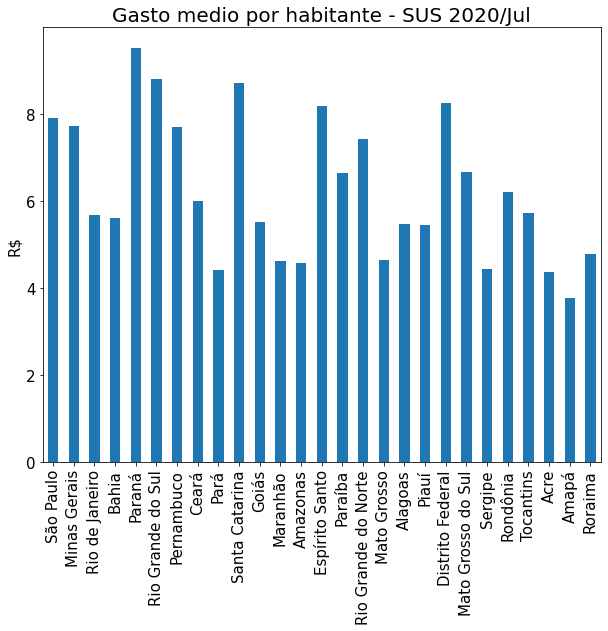

In [86]:
plt.figure(figsize=(10, 8))
populacao_gastos['gasto_por_habitante'].plot(kind='bar', fontsize=15)
plt.title('Gasto medio por habitante - SUS 2020/Jul', fontsize=20)
plt.ylabel('R$', fontsize=15)
plt.xlabel('', fontsize=15)

Text(0.5, 1.0, 'Gasto medio por habitante - SUS 2020/Jul')

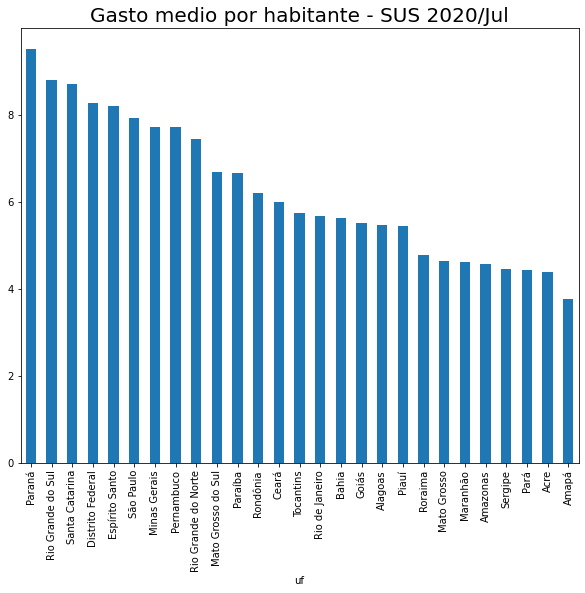

In [87]:
plt.figure(figsize=(10, 8))
populacao_gastos['gasto_por_habitante'].sort_values(ascending=False).plot(kind='bar')
plt.title('Gasto medio por habitante - SUS 2020/Jul', fontsize=20)

##Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

In [88]:
#Seleção dos dados
'''
Período selecionado: 2019/Ago a 2020/Jul
Coluna adicionada: População por uf e média do período

'''
procedimentos_hospitalares_12_meses = procedimentos_hospitalares.T.loc['2019/Ago': '2020/Jul'].T
procedimentos_hospitalares_12_meses.index = procedimentos_hospitalares_12_meses.index.str[3:]
procedimentos_hospitalares_12_meses = procedimentos_hospitalares_12_meses.join(populacao_gastos['populacao'])
procedimentos_hospitalares_12_meses['media_periodo'] = procedimentos_hospitalares_12_meses.T.loc['2019/Ago': '2020/Jul'].mean() / procedimentos_hospitalares_12_meses.T.loc['populacao']
procedimentos_hospitalares_12_meses.head()

,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,populacao,media_periodo
Unidade da Federação,,,,,,,,,,,,,,
Rondônia,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,1796460,4.89
Acre,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,894470,3.47
Amazonas,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,4228381,3.89
Roraima,3788154.80,3217218.61,3113940.14,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,631181,4.93
Pará,31179893.86,34175218.80,36112567.22,36853237.41,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,8690745,4.05


Text(0, 0.5, 'Gasto Médio R$')

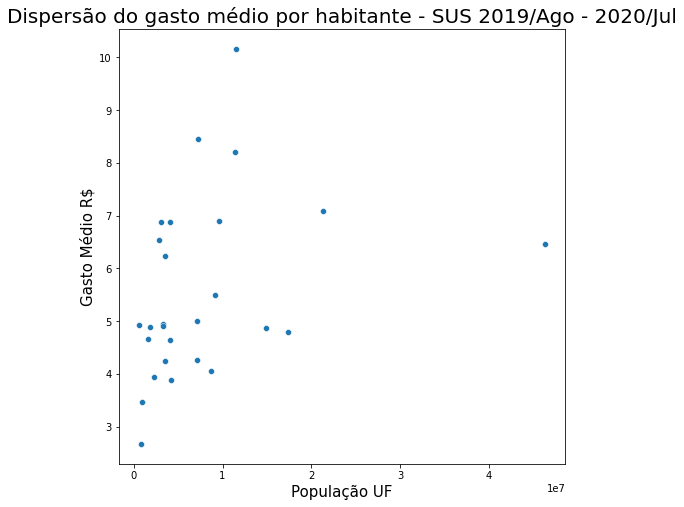

In [89]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='populacao', y='media_periodo', data=procedimentos_hospitalares_12_meses)
plt.title('Dispersão do gasto médio por habitante - SUS 2019/Ago - 2020/Jul',
          fontsize=20)
plt.xlabel('População UF', fontsize=15)
plt.ylabel('Gasto Médio R$', fontsize=15)

Outra forma de olhar essa informação é considerando a porcentagem da população que foi atendida no período, esse dado por ser obtido considerando o número de internações.

##Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

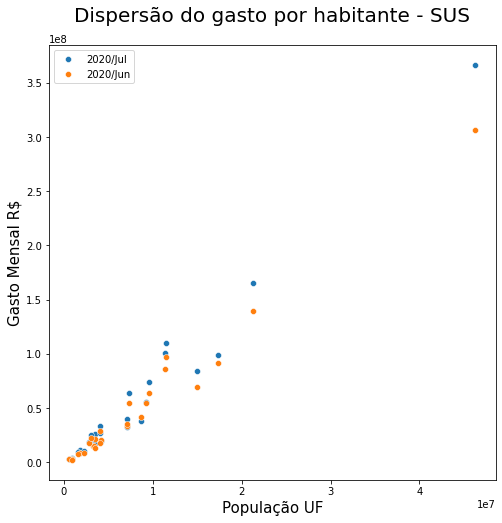

In [90]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='populacao', y='2020/Jul', data=procedimentos_hospitalares_12_meses, label='2020/Jul')
sns.scatterplot(x='populacao', y='2020/Jun', data=procedimentos_hospitalares_12_meses, label='2020/Jun')
plt.title('Dispersão do gasto por habitante - SUS', fontsize=20, y=1.04)
plt.legend()
plt.xlabel('População UF', fontsize=15)
plt.ylabel('Gasto Mensal R$', fontsize=15)
plt.show()

In [91]:
gasto_medio_jul_2020 = procedimentos_hospitalares_12_meses['2020/Jul'] / procedimentos_hospitalares_12_meses['populacao']
gasto_medio_jun_2020 = procedimentos_hospitalares_12_meses['2020/Jun'] / procedimentos_hospitalares_12_meses['populacao']
display(gasto_medio_jul_2020.head(3))
gasto_medio_jun_2020.head(3)

Unidade da Federação
Rondônia   6.21
Acre       4.38
Amazonas   4.58
dtype: object

Unidade da Federação
Rondônia   4.86
Acre       3.40
Amazonas   4.94
dtype: object

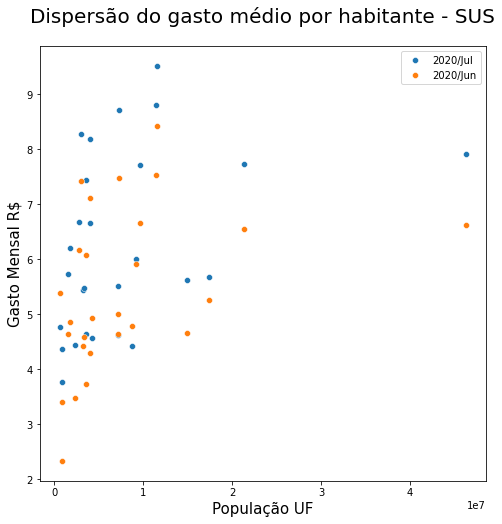

In [92]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='populacao', y=gasto_medio_jul_2020, data=procedimentos_hospitalares_12_meses, label='2020/Jul')
sns.scatterplot(x='populacao', y=gasto_medio_jun_2020, data=procedimentos_hospitalares_12_meses, label='2020/Jun')
plt.title('Dispersão do gasto médio por habitante - SUS', fontsize=20, y=1.04)
plt.legend()
plt.xlabel('População UF', fontsize=15)
plt.ylabel('Gasto Mensal R$', fontsize=15)
plt.show()

O gasto médio por habitante no mês de Julho foi maior comparado ao mês de Junho de 2020.

##Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

Objetivo: Verificar a relação entre as seguintes variáveis

1º Custo total dos procedimentos hospitalares

2º Custo por habitante dos procedimentos hospitalares

3º Proporção dos habitantes que utilizam o serviço do SUS

4º Custo por atendimento

###Função

In [93]:
def adiciona_mes_media_atendimento(dados_gasto: pd.DataFrame, 
                                   dados_atendimento: pd.DataFrame, periodo: str,
                                   dados_adicionados: pd.DataFrame):
  dados_adicionados[f'{periodo}_total'] = dados_gasto[periodo]
  dados_adicionados[f'{periodo}_media_habitante'] = dados_adicionados[f'{periodo}_total'] / dados_adicionados['populacao'] 
  dados_adicionados[f'{periodo}_%_populacao_atendida'] = (dados_atendimento[periodo] / dados_adicionados['populacao']) * 100

In [94]:
procedimentos_hospitalares['2020/Jun']

Unidade da Federação
11 Rondônia                8725530.68
12 Acre                    3045245.80
13 Amazonas               20897542.93
14 Roraima                 3401864.29
15 Pará                   41625331.28
16 Amapá                   2009912.57
17 Tocantins               7384806.71
21 Maranhão               33099356.79
22 Piauí                  14547134.38
23 Ceará                  54409441.05
24 Rio Grande do Norte    21466739.79
25 Paraíba                17332974.95
26 Pernambuco             63987469.53
27 Alagoas                15401094.32
28 Sergipe                 8057935.10
29 Bahia                  69567655.48
31 Minas Gerais          139699763.30
32 Espírito Santo         28942645.28
33 Rio de Janeiro         91507444.94
35 São Paulo             306425499.30
41 Paraná                 96977288.37
42 Santa Catarina         54457911.56
43 Rio Grande do Sul      86051002.13
50 Mato Grosso do Sul     17331445.92
51 Mato Grosso            13151005.63
52 Goiás                  357

###Dados

In [95]:
fonte_valor_medio_internacao = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Valor%20m%C3%A9dio%20intern%20por%20Ano-m%C3%AAs%20processamento%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o.csv'
fonte_numero_internacoes = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/A210049189_28_143_208.csv'
fonte_procedimentos_hospitalares_valor_total = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/A150536189_28_143_208.csv'
fonte_dias_permanencia = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/A163752189_28_143_208.csv'
fonte_media_permanencia = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/M%C3%A9dia%20perman%C3%AAncia%20por%20Ano-m%C3%AAs%20processamento%20segundo%20Regi%C3%A3o.csv'


valor_medio_internacao = pd.read_csv(fonte_valor_medio_internacao, 
                                     encoding='ISO-8859-1', sep=';', skiprows=3,
                                     skipfooter=12, thousands='.', decimal=',')

numero_internacao = pd.read_csv(fonte_numero_internacoes, 
                                     encoding='ISO-8859-1', sep=';', skiprows=3,
                                     skipfooter=12, thousands='.', decimal=',')

numero_internacao.set_index('Unidade da Federação', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


###Tratamentos

Adicionando a populacao ao data frame de número de internações para ordenação do índice

In [96]:
numero_internacao.index = numero_internacao.index.str[3:]

In [97]:
numero_internacao = numero_internacao.join(populacao_gastos['populacao'])

In [98]:
numero_internacao.sort_values('populacao', ascending=False, inplace=True)

In [99]:
numero_internacao.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,populacao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,125361,155799,169738,178746,200439,193555,202386,194738,197277,194543,174370,175203,162995,168100,194928,185550,197319,194082,198671,198792,199606,196425,194467,182073,187926,179027,201359,202648,200028,195168,196112,198949,201568,192603,197354,199177,188683,190234,201161,199692,...,204983,213206,202030,204734,200649,198083,198912,192503,211205,210204,212696,205117,207804,212547,203113,212083,201634,197493,205741,197814,211776,215876,221498,210518,215641,221298,211684,220411,206022,198920,210243,199907,202763,152799,157909,166485,180283,175822,29834460,46289333
Minas Gerais,67509,89738,96161,93949,96064,106686,98481,98257,97953,99139,92486,88366,89661,88228,95288,94012,97785,93841,96457,95970,93654,94019,93239,88630,92208,87723,96678,95532,97640,94005,95503,96049,93876,93454,93686,93491,93602,90607,96079,96643,...,102210,102899,99491,99252,99491,98755,99108,94610,105344,105513,105513,104455,106719,105993,104207,104381,100308,100591,102961,101140,105009,108390,114829,107579,112079,110444,106238,110323,103008,101537,106168,100491,95760,82251,84034,82341,88289,86906,14906793,21331292
Rio de Janeiro,34859,37109,57367,51389,56472,59898,57557,58857,58606,56302,49743,51433,48788,47877,52967,52141,56148,53924,57288,55717,55279,53431,54201,51699,51612,51700,57183,56016,58960,56008,58913,59001,55198,54520,53828,53532,52913,53990,56447,57134,...,58236,59611,56288,57237,54670,53294,56146,52429,58584,60348,61332,59984,62421,61022,58775,59387,57284,52664,60470,56642,57486,58096,64714,61067,64299,64627,62705,63322,60465,56886,60098,55735,54244,46538,51325,51602,55865,54456,8312195,17366189


In [100]:
populacao_gastos.rename(columns={'gasto_por_habitante': '2020/Jul_media_habitante',
                                '2020/Jul': '2020/Jul_total'}, inplace=True)

In [101]:
populacao_gastos.head()

,populacao,2020/Jul_total,2020/Jul_media_habitante
uf,,,
São Paulo,46289333,366721243.71,7.92
Minas Gerais,21331292,164891823.64,7.73
Rio de Janeiro,17366189,98722687.54,5.68
Bahia,14930634,83992134.91,5.63
Paraná,11516840,109658360.43,9.52


In [102]:
populacao_gastos['2020/Jul_%_populacao_atendida'] = (numero_internacao['2020/Jul'] / populacao_gastos['populacao']) * 100

In [103]:
#Retirando a numeração no indice
procedimentos_hospitalares.index = procedimentos_hospitalares.index.str[3:]

In [104]:
#ordenar pela população
procedimentos_hospitalares = procedimentos_hospitalares.join(populacao_gastos['populacao'])

In [105]:
#Ordenando pela coluna populacao
procedimentos_hospitalares.sort_values(['populacao'], ascending=False, inplace=True)

In [106]:
procedimentos_hospitalares.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,populacao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,167990352.53,191857317.83,182797194.35,186855294.82,212777859.48,203186114.01,217040531.70,217195249.91,220761157.51,232536720.14,220292973.66,221987951.33,220117480.90,209094405.40,214565774.66,203116173.19,227248380.06,231543598.66,230188803.42,226021072.14,229662643.34,234530618.12,233453453.42,221127119.42,239790045.49,236929144.68,227533337.27,231062206.94,241947462.16,236443416.78,...,297881361.74,297309345.90,280813753.04,285740593.74,280768835.63,280080500.10,279203782.81,269524844.81,286775733.92,289711791.16,293104281.74,287922148.67,291524922.05,298702204.56,282739086.76,295671659.07,283947815.42,283179040.80,298180056.65,279427204.24,288819396.39,297834670.24,303889049.22,293587709.50,305033842.80,313868712.55,298547868.27,310847061.00,292851698.72,284749770.52,304505286.22,288872273.89,297335842.20,251320040.41,272486957.70,306425499.30,366721243.71,346512263.17,38929549655.89,46289333
Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,78329947.11,86917741.55,91374305.25,90153672.61,95290591.54,94091211.77,99076844.10,96189182.42,102754354.58,100080062.68,96911075.38,97956440.66,100726279.56,95354390.87,99017646.65,91519360.96,101602091.09,102020854.18,103346519.08,102489257.42,104427655.72,104334532.58,102057421.34,102296496.62,104624739.27,106029536.34,102848906.27,103097090.32,107148899.31,109395956.79,...,146849636.29,152645703.34,144488574.05,143939472.31,145123339.34,142848565.53,143158486.97,136705143.41,149829968.56,149894503.75,151546897.83,151514201.61,156680218.93,154281495.01,153867888.29,151228318.67,144867656.44,146715346.61,154066649.81,147968852.80,153459790.69,156777495.40,162963014.15,154830086.49,166207471.07,164287071.70,156567882.88,165120780.19,153006371.54,153880105.15,159196641.54,150118896.34,142773027.09,133340766.09,133388804.72,139699763.30,164891823.64,168024412.95,19160106499.88,21331292
Rio de Janeiro,23025258.52,28394310.93,44567062.94,44054604.82,44911021.15,48056212.24,49872379.35,50912706.60,49270352.76,46434912.38,39907347.52,50581613.99,46203403.72,47094280.97,50808893.61,49188045.37,54038727.15,50720818.82,55050238.31,56202711.73,52027721.77,52063748.46,54304571.03,49771259.00,47245572.10,50655914.79,56116554.62,52070900.49,59396969.31,56866124.20,59807297.10,60274646.13,56849693.50,56972506.41,56226392.98,55766722.97,54468513.71,54490908.51,57189879.36,57530534.48,...,75302602.85,77717421.67,72622372.14,74953056.26,72548265.05,71176514.15,72530675.81,70910964.45,75601732.47,75998173.43,78033245.14,77683410.80,83733892.75,80453782.86,77382979.88,79404597.67,75075912.42,71286431.83,80140801.94,73535570.78,76151310.63,75853453.40,86637168.69,80125747.75,89924590.66,85720860.09,82971188.30,86392490.58,80843671.61,78579849.30,83186258.72,76116203.22,77004637.47,71403516.21,85094073.33,91507444.94,98722687.54,95274486.35,9696364115.11,17366189
Bahia,21211522.47,28189304.95,34181483.52,39026934.13,42949566.82,47025972.04,47481695.17,46931248.28,44883379.31,

In [107]:
populacao_gastos.head()

,populacao,2020/Jul_total,2020/Jul_media_habitante,2020/Jul_%_populacao_atendida
uf,,,,
São Paulo,46289333,366721243.71,7.92,0.39
Minas Gerais,21331292,164891823.64,7.73,0.41
Rio de Janeiro,17366189,98722687.54,5.68,0.32
Bahia,14930634,83992134.91,5.63,0.36
Paraná,11516840,109658360.43,9.52,0.48


In [108]:
adiciona_mes_media_atendimento(procedimentos_hospitalares, numero_internacao,
                               '2020/Jun', populacao_gastos)

In [109]:
populacao_gastos.head()

,populacao,2020/Jul_total,2020/Jul_media_habitante,2020/Jul_%_populacao_atendida,2020/Jun_total,2020/Jun_media_habitante,2020/Jun_%_populacao_atendida
uf,,,,,,,
São Paulo,46289333,366721243.71,7.92,0.39,306425499.30,6.62,0.36
Minas Gerais,21331292,164891823.64,7.73,0.41,139699763.30,6.55,0.39
Rio de Janeiro,17366189,98722687.54,5.68,0.32,91507444.94,5.27,0.30
Bahia,14930634,83992134.91,5.63,0.36,69567655.48,4.66,0.34
Paraná,11516840,109658360.43,9.52,0.48,96977288.37,8.42,0.45


###Visualizações

In [110]:
populacao_gastos['populacao'].head()

uf
São Paulo         46289333
Minas Gerais      21331292
Rio de Janeiro    17366189
Bahia             14930634
Paraná            11516840
Name: populacao, dtype: int64

A região Sudeste possue o maior contingente populacional do país.

In [111]:
populacao_gastos['2020/Jul_%_populacao_atendida'].sort_values(ascending=False).head()

uf
Distrito Federal    0.54
Paraná              0.48
Rio Grande do Sul   0.46
Roraima             0.46
Santa Catarina      0.45
Name: 2020/Jul_%_populacao_atendida, dtype: float64

A região Sul possue a maior taxa da população atendida (população X atendimentos) pelo SUS 2020/Jul

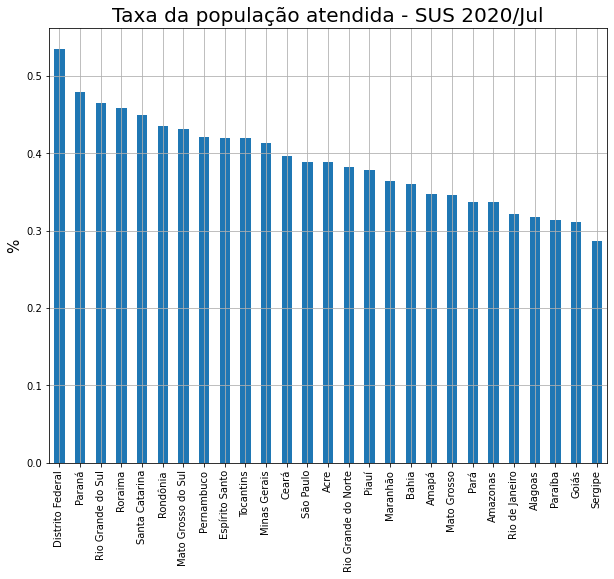

In [112]:
plt.figure(figsize=(10, 8))
populacao_gastos['2020/Jul_%_populacao_atendida'].sort_values(ascending=False).plot(kind='bar',
                                                       grid=True)
plt.title('Taxa da população atendida - SUS 2020/Jul', fontsize=20)
plt.xlabel('')
plt.ylabel('%', fontsize=15)
plt.show()

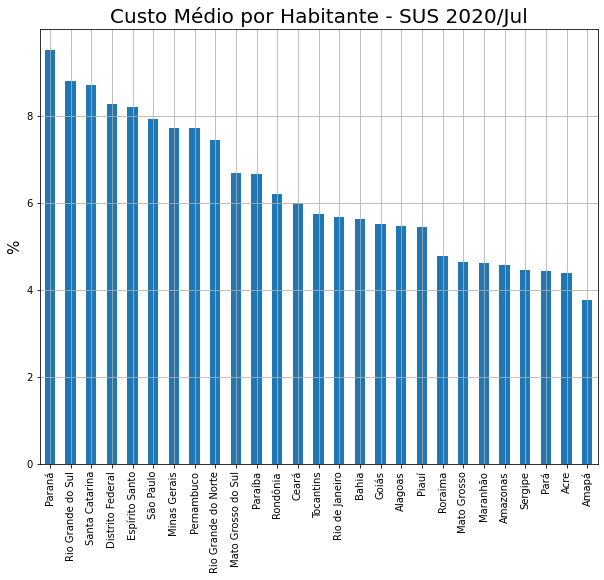

In [113]:
plt.figure(figsize=(10, 8))
populacao_gastos['2020/Jul_media_habitante'].sort_values(ascending=False).plot(kind='bar',
                                                                               grid=True)
plt.title('Custo Médio por Habitante - SUS 2020/Jul', fontsize=20)
plt.xlabel('')
plt.ylabel('%', fontsize=15)
plt.show()

No handles with labels found to put in legend.


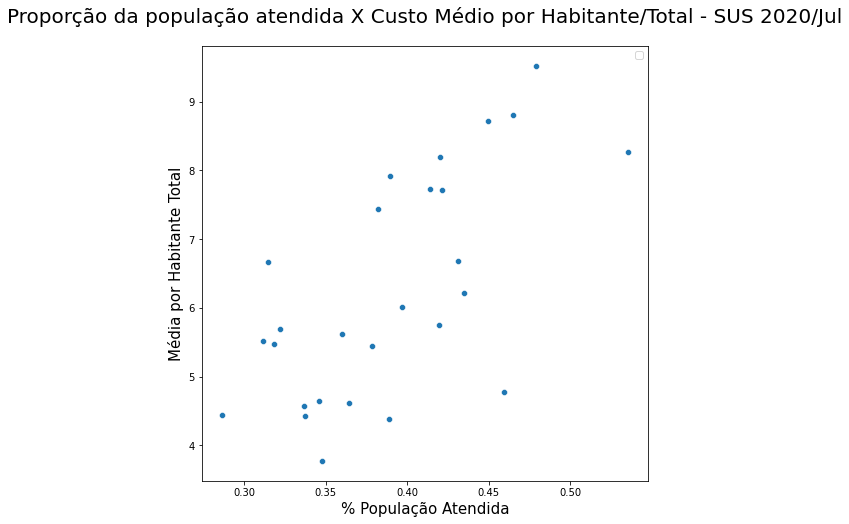

In [114]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='2020/Jul_%_populacao_atendida', y='2020/Jul_media_habitante', 
                data=populacao_gastos)
plt.title('Proporção da população atendida X Custo Médio por Habitante/Total - SUS 2020/Jul', fontsize=20, y=1.04)
plt.legend()
plt.xlabel('% População Atendida', fontsize=15)
plt.ylabel('Média por Habitante Total', fontsize=15)
plt.show()

Os estados do Paraná, Rio Grande do Sul, Santa Catarina e o Distrito Federal possuem maiores médias de custo por habitante, e a maior taxa de habitante atendido no SUS.

In [115]:
populacao_gastos[['2020/Jul_media_habitante', '2020/Jul_%_populacao_atendida']].corr()

,2020/Jul_media_habitante,2020/Jul_%_populacao_atendida
2020/Jul_media_habitante,1.00,0.66
2020/Jul_%_populacao_atendida,0.66,1.00


Existe uma correlação positiva nas variáveis do custo médio por habitante e a taxa de habitante atendido no SUS 2020/Jul.

Uma forma mais direta da saber isso é os critérios utilizados para definir o orçamento do SUS nos estados.

#Ticks, escalas e formatação de imagens

##Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

In [116]:
gasto_mensal = procedimentos_hospitalares.T
gasto_mensal.drop('Total', inplace=True)

In [117]:
gasto_mensal['Bahia'] = gasto_mensal['Bahia'].astype(float)

In [118]:
gasto_mensal['Bahia'].dtypes

dtype('float64')

In [119]:
gasto_mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Rio de Janeiro,Bahia,Paraná,Rio Grande do Sul,Pernambuco,Ceará,Pará,Santa Catarina,Goiás,Maranhão,Amazonas,Espírito Santo,Paraíba,Rio Grande do Norte,Mato Grosso,Alagoas,Piauí,Distrito Federal,Mato Grosso do Sul,Sergipe,Rondônia,Tocantins,Acre,Amapá,Roraima
2008/Jan,91678473.48,45671659.76,23025258.52,21211522.47,38266347.46,30931325.46,14393949.89,15539821.90,18864744.11,16504913.45,15310637.29,10723506.39,4735529.42,5456723.98,10723002.45,5947814.08,4795299.01,6243726.32,7985142.43,4745919.19,5377392.11,2780750.11,1388528.39,3441592.69,902416.00,1120973.34,657889.53
2008/Fev,148677526.82,70194037.10,28394310.93,28189304.95,55384670.52,57363420.01,24181400.95,25735101.55,19553758.20,25651429.11,22258668.68,13559679.41,7118990.57,9102212.86,11386274.47,9509755.83,8684882.23,8376622.16,10079928.25,7632480.67,7002472.61,3676483.16,2931283.42,4985688.85,1497206.26,1268740.33,777939.31
2008/Mar,156087269.23,79231336.95,44567062.94,34181483.52,53801318.85,51547794.07,29991302.71,28724625.75,21937342.70,26743524.89,21442515.75,13985142.36,8196635.49,10249595.97,12053643.87,10352238.59,7886243.14,8408336.22,10298372.45,9647203.26,8423933.19,5051473.61,1541682.52,6205612.60,1794028.48,974651.24,718688.03
2008/Abr,161227125.43,77136537.58,44054604.82,39026934.13,52460306.69,56673338.49,34806197.97,30676457.06,20842829.69,27181488.26,20921212.45,14809416.46,8259378.42,11253833.56,12653528.76,10855108.50,8794109.79,9090794.82,10775976.33,11098732.99,8797487.68,5046063.36,1525314.96,4984482.09,1730469.42,1141137.32,839994.39
2008/Mai,187119397.64,80554440.63,44911021.15,42949566.82,54419620.71,48397733.07,32147987.35,30604453.47,23249952.88,26845308.18,21615970.67,14505727.38,7831399.90,10198619.17,12215107.11,11160168.19,9231645.40,9338771.45,10398360.88,12891719.72,9770421.80,4741151.56,1645953.84,5511002.46,1819443.92,866346.18,862347.96


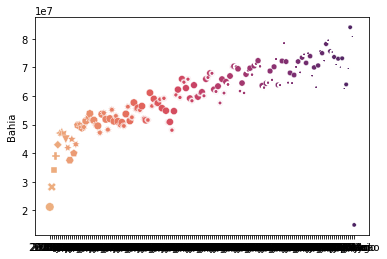

In [120]:
'''
hue - Diferencia a cor de acordo com o parâmetro
size - Diferencia a largura dos pontos no gráfico
style - diferencia o formato dos pontos no gráfico
palette - Diferencia o tom dos pontos no gráfico
'''
sns.scatterplot(data=gasto_mensal, x=gasto_mensal.index, y='Bahia', 
                hue=gasto_mensal.index, legend=False, size=gasto_mensal.index,
                style=gasto_mensal.index, palette="flare")

##Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

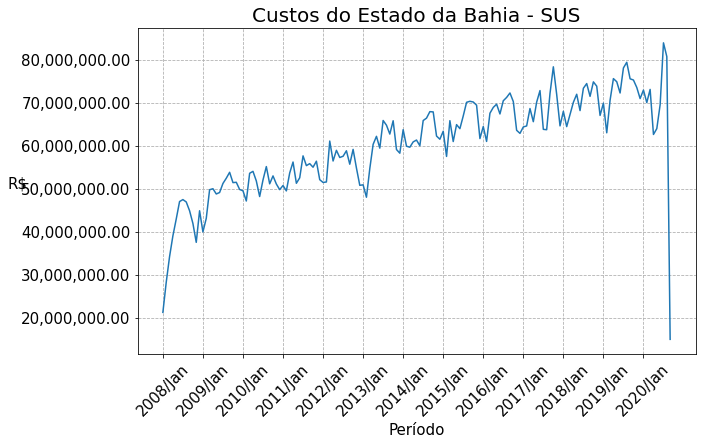

In [121]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=gasto_mensal, x=gasto_mensal.index, y='Bahia')
plt.xticks(rotation=45) #rotacao da legenda do eixo x
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Custos do Estado da Bahia - SUS', fontsize=20)
plt.xlabel('Período', fontsize=15)
plt.ylabel('R$', fontsize=15, rotation='horizontal')
plt.grid(linestyle='--')

plt.rcParams['font.size'] = '15'
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  label.set_fontsize('15') 
'''
Como alterar o tamanho da fonte no matplotlib?
Fonte: https://stackabuse.com/change-font-size-in-matplotlib/
'''

plt.show()

#Trabalhando DateTime e Melt

In [122]:
#Transformar as colunas no tipo data
procedimentos_hospitalares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Columns: 154 entries, 2008/Jan to populacao
dtypes: float64(152), int64(1), object(1)
memory usage: 33.9+ KB


In [123]:
from datetime import date

In [124]:
meses = {
    'Jan': 1,
    'Fev': 2,
    'Mar': 3,
    'Abr': 4,
    'Mai': 5,
    'Jun': 6,
    'Jul': 7,
    'Ago': 8,
    'Set': 9,
    'Out': 10,
    'Nov': 11,
    'Dez': 12
}

In [125]:
procedimentos_hospitalares.columns

Index(['2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun',
       '2008/Jul', '2008/Ago', '2008/Set', '2008/Out',
       ...
       '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr', '2020/Mai', '2020/Jun',
       '2020/Jul', '2020/Ago', 'Total', 'populacao'],
      dtype='object', length=154)

In [126]:
def converte_data(ano_mes: str, meses_ordem=meses):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero = meses_ordem[mes]
  return date(ano, mes_numero, 1)

In [127]:
#Exclusão da linha referente ao dados da populacao
gasto_mensal.drop('populacao', axis=0, inplace=True)

In [128]:
gasto_mensal.index = gasto_mensal.index.map(converte_data)

In [129]:
gasto_mensal.index

Index([2008-01-01, 2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01,
       2008-07-01, 2008-08-01, 2008-09-01, 2008-10-01,
       ...
       2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01, 2020-04-01,
       2020-05-01, 2020-06-01, 2020-07-01, 2020-08-01],
      dtype='object', length=152)

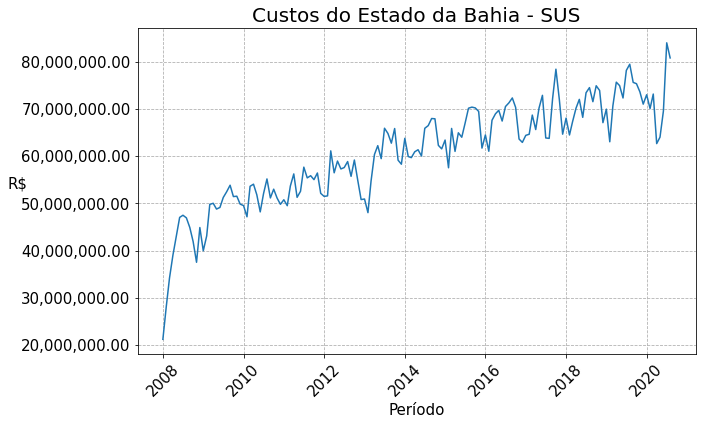

In [130]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=gasto_mensal, x=gasto_mensal.index, y='Bahia')
plt.xticks(rotation=45) #rotacao da legenda do eixo x
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0)) O índex no formato de data dispensa a configuração do espaço na legenda
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Custos do Estado da Bahia - SUS', fontsize=20)
plt.xlabel('Período', fontsize=15)
plt.ylabel('R$', fontsize=15, rotation='horizontal')
plt.grid(linestyle='--')

plt.rcParams['font.size'] = '15'
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  label.set_fontsize('15') 
'''
Como alterar o tamanho da fonte no matplotlib?
Fonte: https://stackabuse.com/change-font-size-in-matplotlib/
'''

plt.show()

##Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

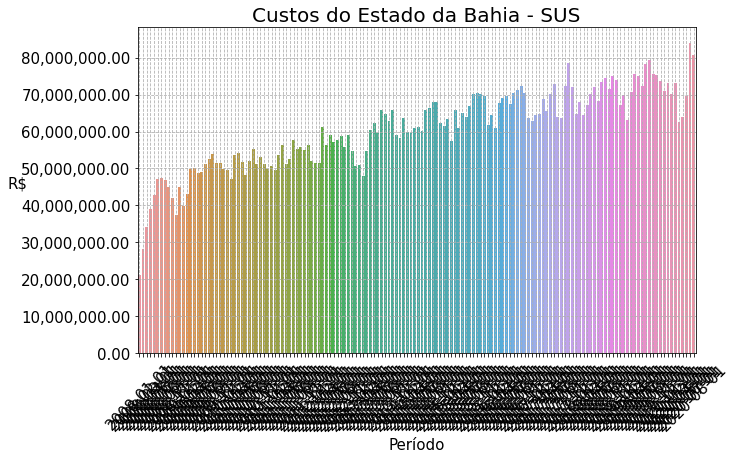

In [131]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=gasto_mensal, x=gasto_mensal.index, y='Bahia')
plt.xticks(rotation=45) #rotacao da legenda do eixo x
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0)) O índex no formato de data dispensa a configuração do espaço na legenda
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Custos do Estado da Bahia - SUS', fontsize=20)
plt.xlabel('Período', fontsize=15)
plt.ylabel('R$', fontsize=15, rotation='horizontal')
plt.grid(linestyle='--')

plt.rcParams['font.size'] = '15'
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  label.set_fontsize('15') 
'''
Como alterar o tamanho da fonte no matplotlib?
Fonte: https://stackabuse.com/change-font-size-in-matplotlib/
'''

plt.show()

In [133]:
#Conversão do index para datetime
gasto_mensal.index = pd.to_datetime(gasto_mensal.index)

In [138]:
#conversão das colunas para float
gasto_mensal.T.loc['São Paulo': 'Roraima'].astype(float)

ValueError: ignored

In [134]:
gasto_mensal.resample('A').sum()

Unidade da Federação,Bahia
2008-12-31,476204799.63
2009-12-31,591109057.21
2010-12-31,616650968.67
2011-12-31,646488530.95
2012-12-31,673849510.16
2013-12-31,712401313.44
2014-12-31,757704806.91
2015-12-31,785597108.46
2016-12-31,810137241.08
2017-12-31,821240562.79


In [ ]:
print(pd.__version__)

##Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

##Desafio 03: Melhorar o gráfico da distribuição do gráfico:

Escolha apenas alguns estados.
Mude a palete de cores.
Posicione a legenda de forma mais adequada.
Adicione título principal e nos eixos x e y.